In [48]:
from scipy.io import arff
from io import StringIO
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import MinMaxScaler, Normalizer, add_dummy_feature, label_binarize
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc



In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Load and review data

Load breast cancer data. Build out cleaning strategies to be tested.

In [14]:
breast_cancer = load_breast_cancer()

In [15]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [17]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
sum(breast_cancer.target)/len(breast_cancer.target)

0.6274165202108963

In [19]:
scl_min_max = MinMaxScaler()
scl_min_max.fit(breast_cancer.data)

scl_norm = Normalizer()
scl_norm.fit(breast_cancer.data)

Normalizer(copy=True, norm='l2')

## Split data into train, test, validate.

Usually we spli data into train, test and validate sets. The validation set is put away and only used in the final review with the stakeholders.

bc_validate = validation set

bc_test = test set

bc_train = training set

In [20]:
bc_working_data, bc_validate_data, bc_working_target, bc_validate_target = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.1, random_state = 1, shuffle=True)

bc_data_train, bc_data_test, bc_train_target, bc_test_target = train_test_split(bc_working_data, bc_working_target, test_size = 0.2, random_state = 1)


## Decision Trees

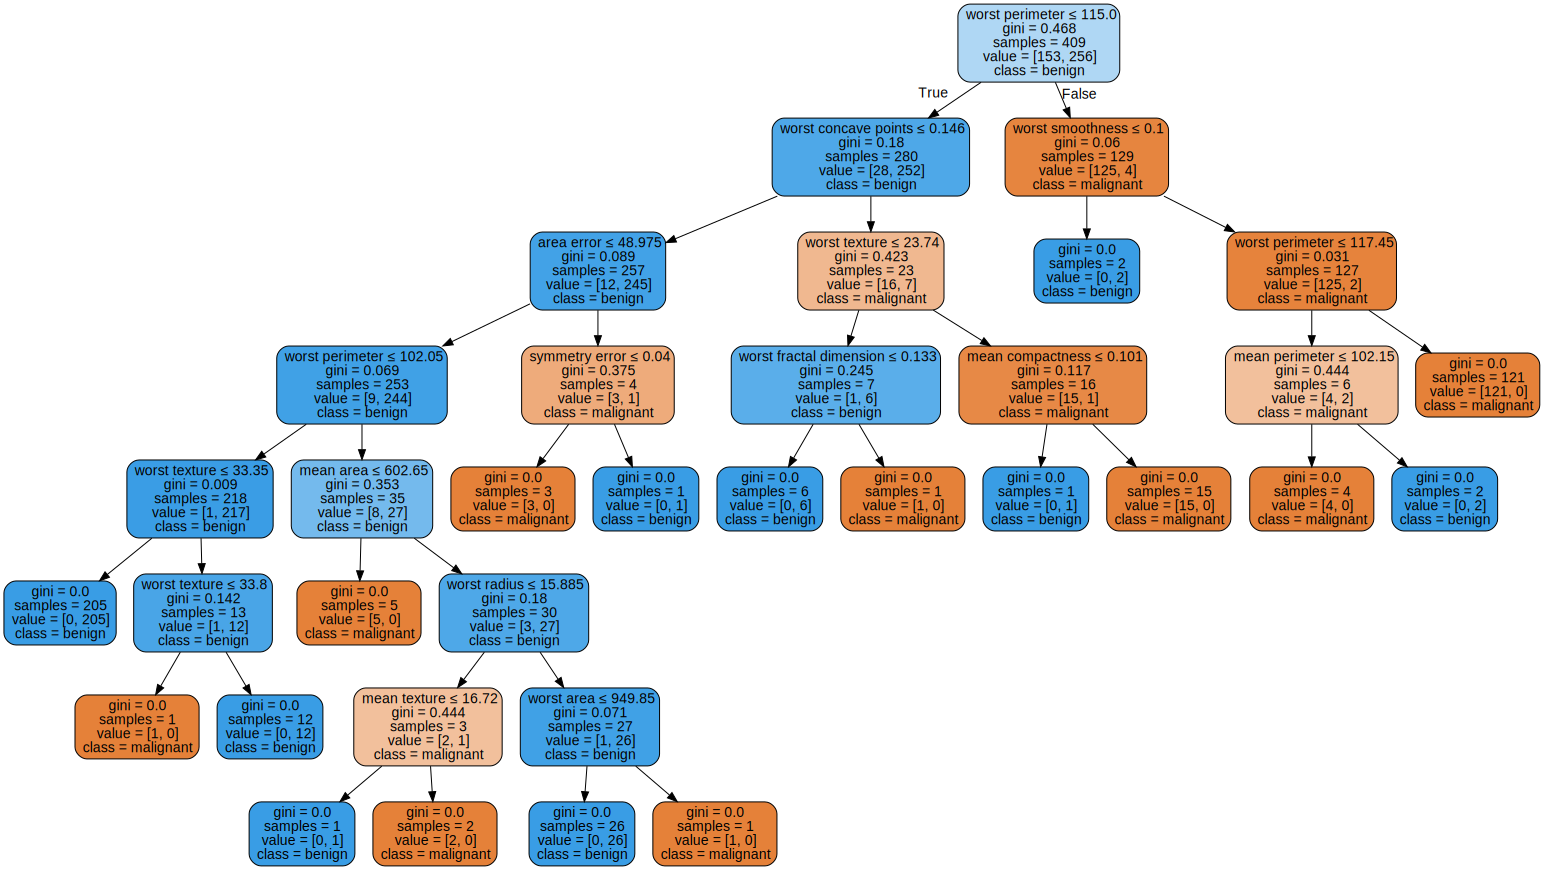

In [22]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(bc_data_train, bc_train_target)

dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=breast_cancer.feature_names, class_names= breast_cancer.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [23]:
clf_dt2 = tree.DecisionTreeClassifier()
params_dt = {'criterion': ['gini', 'entropy'],'min_samples_split': [2,5,10], 'min_samples_leaf': [2,3,5]}
clf_gs_dt = GridSearchCV(clf_dt2, params_dt, cv=5, return_train_score=True)
clf_gs_dt.fit(bc_data_train, bc_train_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 3, 5], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
dt_params = clf_gs_dt.cv_results_['params'][clf_gs_dt.best_index_]

In [25]:
dt_params

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2}

In [26]:
clf_dt_opt = tree.DecisionTreeClassifier(criterion=dt_params['criterion'], min_samples_split=dt_params['min_samples_split'], min_samples_leaf=dt_params['min_samples_leaf'])
clf_dt_opt = clf_dt_opt.fit(bc_data_train, bc_train_target)

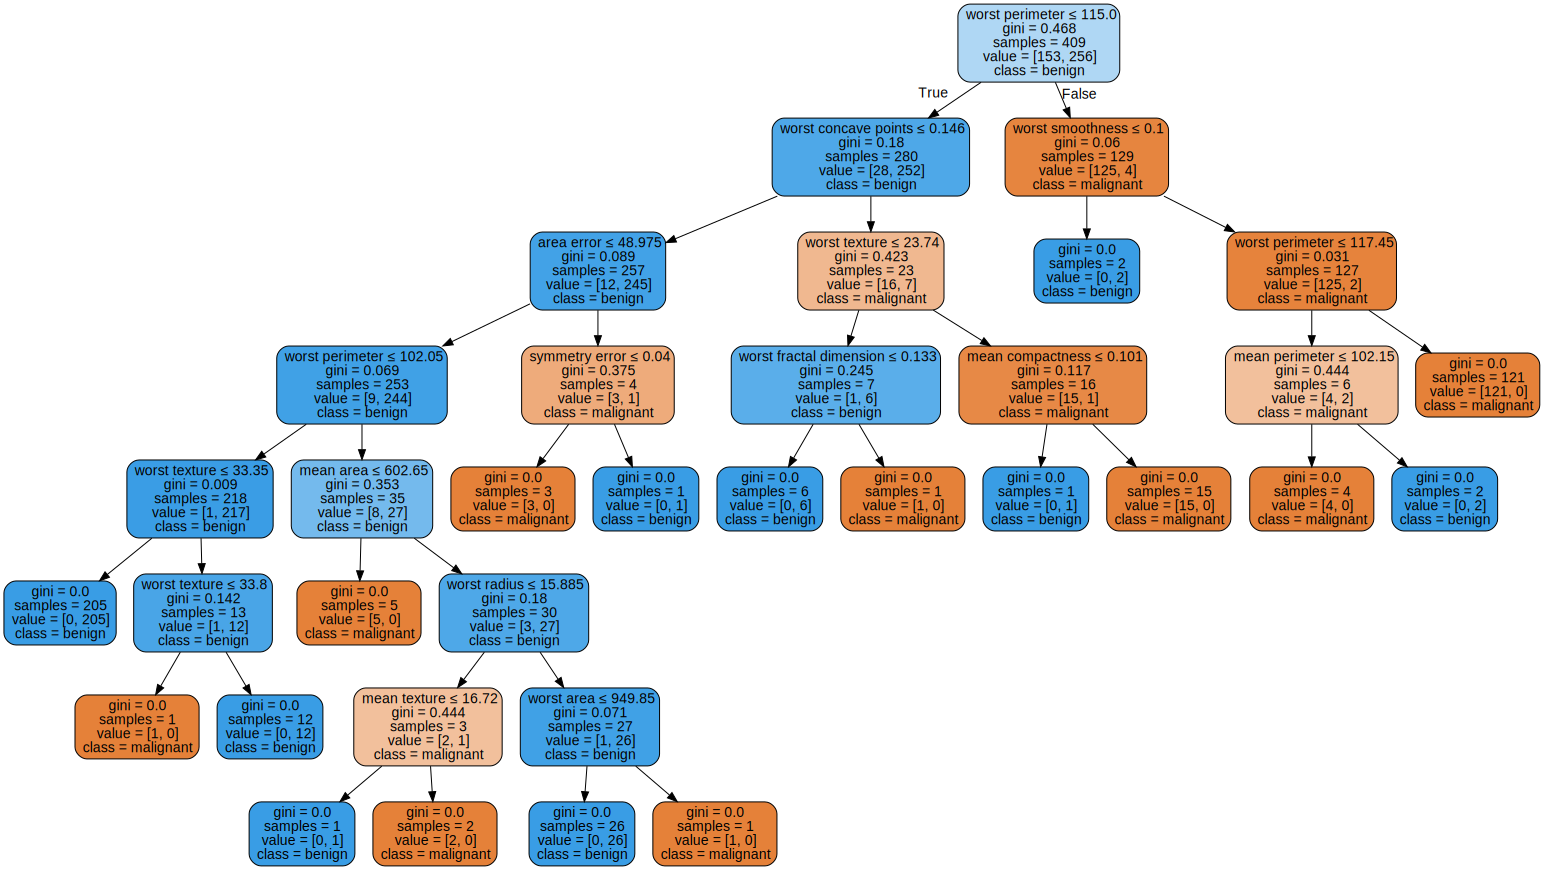

In [27]:
dot_data = tree.export_graphviz(clf_dt, out_file=None, feature_names=breast_cancer.feature_names, class_names= breast_cancer.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

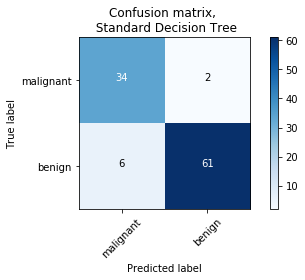

In [28]:
bc_pred_dt = clf_dt.predict(bc_data_test)

cnf_matrix = confusion_matrix(bc_test_target, bc_pred_dt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n Standard Decision Tree')

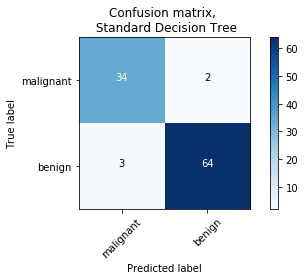

In [29]:
bc_pred_dt_opt = clf_dt_opt.predict(bc_data_test)

cnf_matrix = confusion_matrix(bc_test_target, bc_pred_dt_opt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n Standard Decision Tree')

In [30]:
print(classification_report(bc_test_target, bc_pred_dt_opt, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.92      0.94      0.93        36
     benign       0.97      0.96      0.96        67

avg / total       0.95      0.95      0.95       103



In [31]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

roc_auc_score(bc_test_target, bc_pred_dt_opt)

0.9498341625207297

## KNeighbors Classifier

Classifier implementing k-nearest neighbor vote...

In [32]:
clf_kn_5 = KNeighborsClassifier()
clf_kn_5 = clf_kn_5.fit(bc_data_train, bc_train_target)

In [33]:
bc_pred_kn_5 = clf_kn_5.predict(bc_data_test)

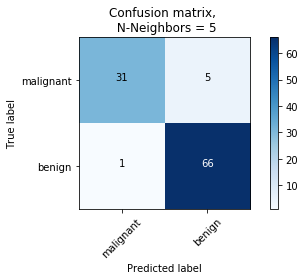

In [34]:
cnf_matrix = confusion_matrix(bc_test_target, bc_pred_kn_5)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n N-Neighbors = 5')

In [35]:
print(classification_report(bc_test_target, bc_pred_kn_5, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.97      0.86      0.91        36
     benign       0.93      0.99      0.96        67

avg / total       0.94      0.94      0.94       103



In [36]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(bc_test_target, bc_pred_kn_5)

0.9230928689883914

In [37]:
clf_kn = KNeighborsClassifier()
params_kn = {"n_neighbors": [2,3,5,7,11]}
clf_gs_kn = GridSearchCV(clf_kn, params_kn, cv=5, return_train_score=True)
clf_gs_kn.fit(bc_data_train, bc_train_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 5, 7, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
kn_params = clf_gs_kn.cv_results_['params'][clf_gs_kn.best_index_]
kn_params

{'n_neighbors': 3}

In [39]:
clf_kn_opt = KNeighborsClassifier(n_neighbors=kn_params["n_neighbors"])
clf_kn_opt = clf_kn_opt.fit(bc_data_train, bc_train_target)
bc_pred_kn_opt = clf_kn_opt.predict(bc_data_test)

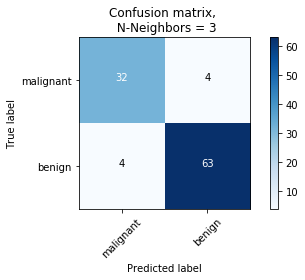

In [40]:
cnf_matrix = confusion_matrix(bc_test_target, bc_pred_kn_opt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n N-Neighbors = 3')

In [41]:
print(classification_report(bc_test_target, bc_pred_kn_opt, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.89      0.89      0.89        36
     benign       0.94      0.94      0.94        67

avg / total       0.92      0.92      0.92       103



In [42]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(bc_test_target, bc_pred_kn_opt)

0.9145936981757877

## Logistic Regression
Logistic Regression (aka logit, MaxEnt) classifier.

In [43]:
clf_log = LogisticRegression()
clf_log = clf_log.fit(bc_data_train, bc_train_target)

In [44]:
bc_pred_log = clf_log.predict(bc_data_test)

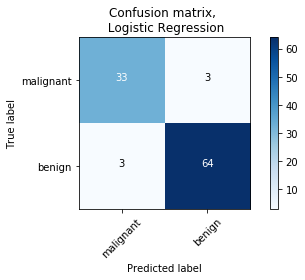

In [45]:
cnf_matrix = confusion_matrix(bc_test_target, bc_pred_log)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n Logistic Regression')

In [46]:
print(classification_report(bc_test_target, bc_pred_log, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.92      0.92      0.92        36
     benign       0.96      0.96      0.96        67

avg / total       0.94      0.94      0.94       103



In [47]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(bc_test_target, bc_pred_log)

0.9359452736318409

## NaiveBayes
Naive Bayes classifier for multinomial models

In [35]:
clf_nb = MultinomialNB()
clf_nb = clf_nb.fit(bc_data_train, bc_train_target)

In [36]:
bc_pred_nb = clf_nb.predict(bc_data_test)

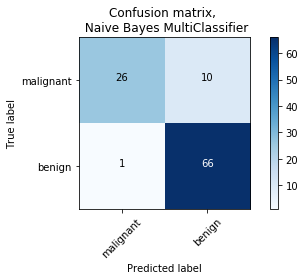

In [37]:
cnf_matrix = confusion_matrix(bc_test_target, bc_pred_nb)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n Naive Bayes MultiClassifier')

In [38]:
print(classification_report(bc_test_target, bc_pred_nb, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.96      0.72      0.83        36
     benign       0.87      0.99      0.92        67

avg / total       0.90      0.89      0.89       103



In [39]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(bc_test_target, bc_pred_nb)

0.8536484245439468

## Gaussian NB

Naive Baiyes Gaussian NB classifier

In [49]:
clf_gauss = GaussianNB()
clf_gauss = clf_gauss.fit(bc_data_train, bc_train_target)

In [50]:
bc_pred_gauss = clf_gauss.predict(bc_data_test)

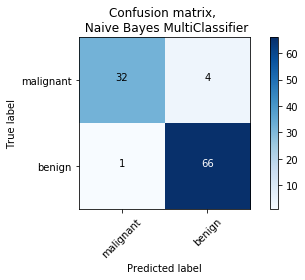

In [51]:
cnf_matrix = confusion_matrix(bc_test_target, bc_pred_gauss)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=breast_cancer.target_names,
                      title='Confusion matrix, \n Naive Bayes MultiClassifier')

In [52]:
print(classification_report(bc_test_target, bc_pred_gauss, target_names=breast_cancer.target_names))

             precision    recall  f1-score   support

  malignant       0.97      0.89      0.93        36
     benign       0.94      0.99      0.96        67

avg / total       0.95      0.95      0.95       103



In [53]:
roc_auc_score(bc_test_target, bc_pred_gauss)

0.9369817578772802